# Ionic screening under temperature gradient for the electrolyte model

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc as pltrc

We employ the relation linking the charge density $\rho_Q(x)$ to the potential $\phi$ (see Eq. (9) of the main text under LDA):

$$
\rho_Q(x) = - \frac{4Z^2}{B^T_{QQ}} \phi(x)
$$

together with the Poisson equation away from the perturbation, which, in MKS system, reads

$$
\epsilon \epsilon_0 \phi''(x)= - \rho_Q(x),
$$
so that
$$
\phi''(x) = \frac{4Z^2}{\epsilon \epsilon_0 B^T_{QQ}} \phi(x).
$$

In the notation of this notebook, where
* `a = 4.0 * kB * T/ rho`
* `b = 4.0 * kB / rho`
* `c = 4.0 * Z1**2 / (eps*eps0)`,

we have
$$
B^T_{QQ} = \mathtt{a + b*alpha*x}.
$$

For the case of Debye-Hückel, only $\mathtt{a}$ survives in $B^T_{QQ}$ and we have the Debye $\kappa_D$:

$$
\kappa_D = \sqrt{\frac{4Z^2}{\epsilon \epsilon_0 B^0_{QQ}}} = \sqrt{\frac{\mathtt{c}}{\mathtt{a}}}
$$
Therefore:
$$
\frac{\phi(x)}{\rho_Q(x)} = -\frac{1}{\epsilon \epsilon_0 \kappa_D^2}.
$$
The electric field can be obtained as $-\frac{\partial \phi}{\partial x}$.

## Single wall system
Comparison w.r.t. equilibrium solutions, parametrized solutions and Seebeck effect for a single surface

In [2]:
rhoseebeck = {}

rho_N (M)                      =  0.01
alpha (K/micron)               =  -10.0
====== eta Seebeck   ======
eta Seebeck (e/nm²)            =  8.842156141300245e-06
eta Seebeck (C/m²)             =  1.41666992e-06
====== eta Seebeck   ======
eta Seebeck_B (e/nm²)          =  -2.2105390353250613e-06
eta Seebeck_B (C/m²)           =  -3.5416748e-07
====== eta to screen ======
surface charge (e/nm²)         =  0.9999999999999999
surface charge (C/m²)          =  0.1602177
eta_S_A / eta                  =  8.842156141300245e-06
eta_S_B / eta                  =  -2.2105390353250613e-06
max x for negative alpha: a/(b|alpha|) (m) =  2.9999999999999994e-05
====== charge integrals =====
charge = -0.16030965706927058
charge DH param = -0.16030965892885252
charge DH = -0.16030965977606104
charge Seebeck A = 1.417483042698619e-06
charge Seebeck B = -3.543707606746548e-07



(-5.0, 55.0)

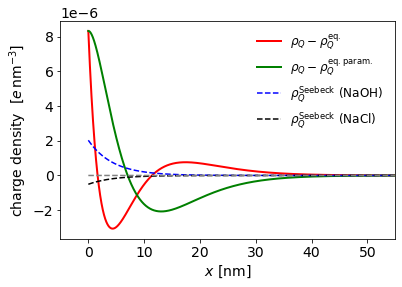

In [3]:
T = 300 # K
rho_M = 0.01 # M
Nav = 6.02214076e23 # particles/mole  
kB = 1.380649e-23 # J/K
rho = rho_M*Nav/1e-3 # particles/m^3
print("rho_N (M)                      = ", rho_M)

eps = 80.0 # relative dielectric permittivity
eps0 = 8.854187e-12 # SI
elch = 1.602177e-19 # SI (i.e., Coulomb)
Z1 = 1.0*elch

# MESH PARAMETERS
L = 160e-9 # meters
dx = 0.005e-9 # meters
n = int(L/dx)
xcell = np.zeros(n)
for ix in range(n):
    xcell[ix] = ix*dx

# TEMPERATURE GRADIENT
alpha = -10.0e6 # K/m
print("alpha (K/micron)               = ", alpha*1e-6)

# ================ FIRST SEEBECK

seebeck = -0.2e-3 # V/K
eseebeck = seebeck * alpha # V/m
etaseebeck = eseebeck * eps * eps0 # C/m^2

etaseebeck_einvnm2 = etaseebeck / elch * 1e-18 # e nm^-2

print("====== eta Seebeck   ======")
print("eta Seebeck (e/nm²)            = ", etaseebeck_einvnm2)
print("eta Seebeck (C/m²)             = ", etaseebeck)

# ================ SECOND SEEBECK

seebeck_B = 0.05e-3 # V/K
eseebeck_B = seebeck_B * alpha # V/m
etaseebeck_B = eseebeck_B * eps * eps0 # C/m^2

etaseebeck_B_einvnm2 = etaseebeck_B / elch * 1e-18

print("====== eta Seebeck   ======")
print("eta Seebeck_B (e/nm²)          = ", etaseebeck_B_einvnm2)
print("eta Seebeck_B (C/m²)           = ", etaseebeck_B)

eta = +1.0*elch/1e-18 # i.e.: +1.0e/nm^2 written in C/m^2

print("====== eta to screen ======")
print("surface charge (e/nm²)         = ", eta/ elch * 1e-18)
print("surface charge (C/m²)          = ", eta)
print("eta_S_A / eta                  = ", etaseebeck/eta)
print("eta_S_B / eta                  = ", etaseebeck_B/eta)

a = 4.0*kB*T/rho
b = 4.0*kB/rho
c = 4.0*Z1**2/(eps*eps0)

if alpha < 0:
    print("max x for negative alpha: a/(b|alpha|) (m) = ", a/b/np.abs(alpha) )

def chargeDH(x):
    if alpha < 0:
        charge2 = (a-b*np.abs(alpha)*x)**(-3.0/4.0)\
        *np.exp(+2.0*np.sqrt(c*(a-b*np.abs(alpha)*x)/(alpha**2*b**2))-2.0*np.sqrt(c*a/(alpha**2*b**2)))
    else:
        charge2 = (a+b*alpha*x)**(-3.0/4.0)\
        *np.exp(-2.0*np.sqrt(c*(a+b*alpha*x)/(alpha**2*b**2))+2.0*np.sqrt(c*a/(alpha**2*b**2)))
    return charge2

def eleDH(x):
    if alpha < 0:
        electric2 = -(1/eps0/eps)*np.abs(alpha)*b/c*(a-b*np.abs(alpha)*x)**(-3.0/4.0)\
        *(1.0/4.0+np.sqrt(c*(a-b*np.abs(alpha)*x)/(alpha**2*b**2)))\
        *np.exp(+2.0*np.sqrt(c*(a-b*np.abs(alpha)*x)/(alpha**2*b**2))-2.0*np.sqrt(c*a/(alpha**2*b**2)))
    else:
        electric2 = (1/eps0/eps)*alpha*b/c*(a+b*alpha*x)**(-3.0/4.0)\
        *(1.0/4.0-np.sqrt(c*(a+b*alpha*x)/(alpha**2*b**2)))\
        *np.exp(-2.0*np.sqrt(c*(a+b*alpha*x)/(alpha**2*b**2))+2.0*np.sqrt(c*a/(alpha**2*b**2)))
    return electric2

print("====== charge integrals =====")

EDH = eleDH(0.0)
Efield = eta/(eps0*eps)
k = Efield/EDH

Q = 0.0
rhoQDH = np.zeros(int(n))
Efieldx = np.zeros(int(n))
for ix in range(int(n)):
    x = ix*dx
    rhoQDH[ix] = k*chargeDH(x)
    Efieldx[ix] = k*eleDH(x)
    Q+=rhoQDH[ix]
print("charge =", Q*dx)

def chargeDHparam(x):
    kD = np.sqrt(c*rho/(4*kB*(T+alpha*x)))
    charge2 = -kD**2*np.exp(-kD*x)
    return charge2    

def eleDHparam(x):
    kD = np.sqrt(c*rho/(4*kB*(T+alpha*x)))
    electric2 = 2 * np.pi * np.exp(-kD*x) * kD**3 * (2.0*a + b*alpha*x)/c    /(4.0*np.pi*eps0*eps)
    return electric2 

EDH = eleDHparam(0.0)
Efield = eta/(eps0*eps)
k = Efield/EDH

Q = 0.0
Efieldxparam = np.zeros(int(n))
rhoQDHparam = np.zeros(int(n))
for ix in range(int(n)):
    x = ix*dx
    #print(chargeDH(x))
    rhoQDHparam[ix] = k*chargeDHparam(x)   
    Efieldxparam[ix] = k*eleDHparam(x)
    Q+=rhoQDHparam[ix]
print("charge DH param =", Q*dx)

def chargeDHeq(x):
    kD = np.sqrt(c*rho/(4*kB*(T)))
    charge2 = -kD**2*np.exp(-kD*x)
    return charge2    

def eleDHeq(x):
    kD = np.sqrt(c*rho/(4*kB*(T)))
    electric2 = kD*np.exp(-kD*x)/(eps0*eps)
    return electric2 

EDH = eleDHeq(0.0)
Efield = eta/(eps0*eps)
k = Efield/EDH

Q = 0.0
rhoQDHeq = np.zeros(int(n))
for ix in range(int(n)):
    x = ix*dx
    #print(chargeDH(x))
    rhoQDHeq[ix] = k*chargeDHeq(x)    
    Q+=rhoQDHeq[ix]
print("charge DH =", Q*dx)

EDH = eleDHeq(0.0)
Efield = -etaseebeck/(eps0*eps) # minus sign since it is not a screen
kseebeck = Efield/EDH

Qseebeck = 0.0
rhoQDHseebeck = np.zeros(int(n))
Efieldxseebeck = np.zeros(int(n))
for ix in range(int(n)):
    x = ix*dx
    #print(chargeDH(x))
    rhoQDHseebeck[ix] = kseebeck*chargeDHeq(x)
    Efieldxseebeck[ix] = kseebeck*eleDHeq(x)
    Qseebeck+=rhoQDHseebeck[ix]
print("charge Seebeck A =", Qseebeck*dx)

EDH = eleDHeq(0.0)
Efield = -etaseebeck_B/(eps0*eps) # minus sign since it is not a screen
kseebeck_B = Efield/EDH

Qseebeck_B = 0.0
rhoQDHseebeck_B = np.zeros(int(n))
Efieldxseebeck_B = np.zeros(int(n))
for ix in range(int(n)):
    x = ix*dx
    #print(chargeDH(x))
    rhoQDHseebeck_B[ix] = kseebeck_B*chargeDHeq(x)
    Efieldxseebeck_B[ix] = kseebeck_B*eleDHeq(x)
    Qseebeck_B+=rhoQDHseebeck_B[ix]
print("charge Seebeck B =", Qseebeck_B*dx)


print("")


nmax = int(n)    

matplotlib.rcParams.update({'font.size': 14})

plt.plot(xcell[:nmax]*1e9,(rhoQDH[:nmax]-rhoQDHeq[:nmax])/elch*1e-27, lw=2, color="red",label=r"$\rho_Q-\rho^{\mathrm{eq.}}_Q$")
plt.plot(xcell[:nmax]*1e9,(rhoQDH[:nmax]-rhoQDHparam[:nmax])/elch*1e-27, lw=2, color="green",label=r"$\rho_Q-\rho^{\mathrm{eq.param.}}_Q$")
plt.plot(xcell[:nmax]*1e9,(rhoQDHseebeck[:nmax])/elch*1e-27, '--', color="blue",label=r"$\rho^{\mathrm{Seebeck}}_Q$ (NaOH) ")
plt.plot(xcell[:nmax]*1e9,(rhoQDHseebeck_B[:nmax])/elch*1e-27, '--', color="black",label=r"$\rho^{\mathrm{Seebeck}}_Q$ (NaCl) ")

plt.plot(xcell[:nmax]*1e9,np.zeros(len(xcell))[:nmax],"--",color="grey")
plt.xlabel("$x$ $[\mathrm{nm}]$")
plt.ylabel(r"charge density  $[e \, \mathrm{nm}^{-3}]$")
plt.legend(frameon=False, prop={'size': 12}) 
plt.xlim(-5,55)
    
#plt.savefig("../figures/DH-compa-seebeck.pdf",bbox_inches='tight',dpi=900)

## Double wall system

### Debye-Hückel equilibrium solutions

In [4]:
def chargeDHeq1(x):
    kD = np.sqrt(c/a)
    return -kD**2*np.exp(-kD*x)    

def eleDHeq1(x):
    kD = np.sqrt(c/a)
    return kD*np.exp(-kD*x)/(eps0*eps)

def potDHeq1(x):
    kD = np.sqrt(c/a)
    return np.exp(-kD*x)/(eps0*eps) 

def chargeDHeq2(x):
    kD = np.sqrt(c/a)
    return -kD**2*np.exp(kD*x)   

def eleDHeq2(x):
    kD = np.sqrt(c/a)
    return -kD*np.exp(kD*x)/(eps0*eps) 

def potDHeq2(x):
    kD = np.sqrt(c/a)
    return np.exp(kD*x)/(eps0*eps) 

### Our solutions in the presence of a thermal gradient

In [5]:
def chargeDH1(x):
    charge1 = (a+b*alpha*x)**(-3.0/4.0)\
    *np.exp(2.0*np.sqrt(c*(a+b*alpha*x)/(alpha**2*b**2))-2.0*np.sqrt(c*a/(alpha**2*b**2)))
    return charge1

def chargeDH2(x):
    charge2 = (a+b*alpha*x)**(-3.0/4.0)\
    *np.exp(-2.0*np.sqrt(c*(a+b*alpha*x)/(alpha**2*b**2))+2.0*np.sqrt(c*a/(alpha**2*b**2)))
    return charge2

def eleDH1(x):
    electric1 = alpha*b/c*(a+b*alpha*x)**(-3.0/4.0)\
    *(1.0/4.0+np.sqrt(c*(a+b*alpha*x)/(alpha**2*b**2)))\
    *np.exp(2.0*np.sqrt(c*(a+b*alpha*x)/(alpha**2*b**2))-2.0*np.sqrt(c*a/(alpha**2*b**2)))  /(eps0*eps)
    return electric1

def eleDH2(x):
    electric1 = alpha*b/c*(a+b*alpha*x)**(-3.0/4.0)\
    *(1.0/4.0-np.sqrt(c*(a+b*alpha*x)/(alpha**2*b**2)))\
    *np.exp(-2.0*np.sqrt(c*(a+b*alpha*x)/(alpha**2*b**2))+2.0*np.sqrt(c*a/(alpha**2*b**2)))  /(eps0*eps)
    return electric1

def potDH1(x):
    potential1 = -1.0/c*(a+b*alpha*x)**(1.0/4.0)\
    *np.exp(2.0*np.sqrt(c*(a+b*alpha*x)/(alpha**2*b**2))-2.0*np.sqrt(c*a/(alpha**2*b**2)))  /(eps0*eps)
    return potential1

def potDH2(x):
    potential2 = -1.0/c*(a+b*alpha*x)**(1.0/4.0)\
    *np.exp(-2.0*np.sqrt(c*(a+b*alpha*x)/(alpha**2*b**2))+2.0*np.sqrt(c*a/(alpha**2*b**2)))  /(eps0*eps)
    return potential2

Walls distance (nm) 3 ,     Temperature difference (K)    =  -0.030000000000000002
charge DH (C/m²) (should be ~0 having two walls) = -2.4370118849927528e-05
charge (C/m²) (should be ~0 having two walls) = -2.4371291232479018e-05


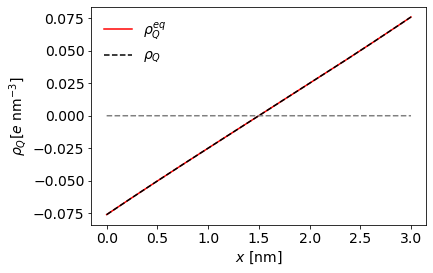

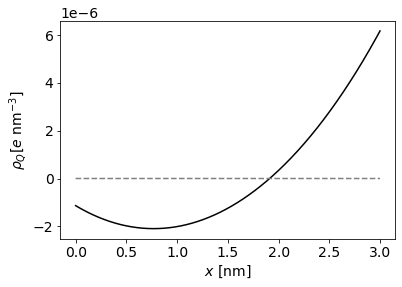

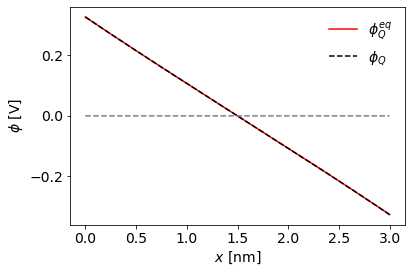

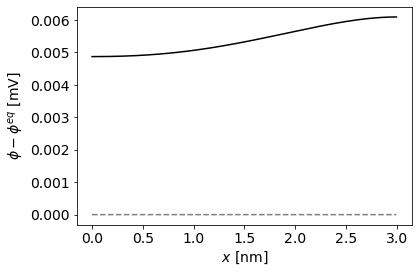

Walls distance (nm) 6 ,     Temperature difference (K)    =  -0.060000000000000005
charge DH (C/m²) (should be ~0 having two walls) = -4.3919004577209946e-05
charge (C/m²) (should be ~0 having two walls) = -4.3922829806751027e-05


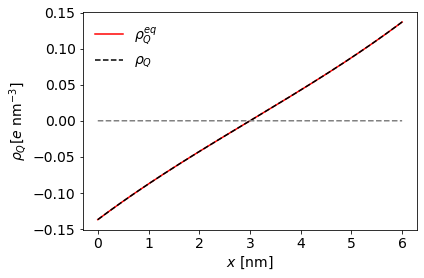

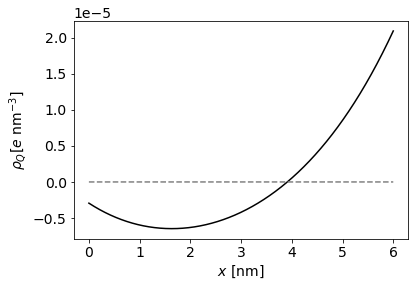

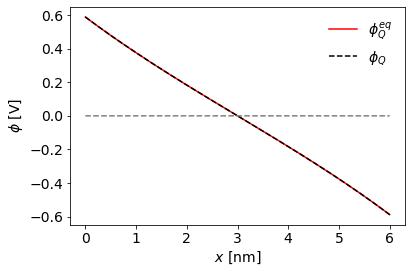

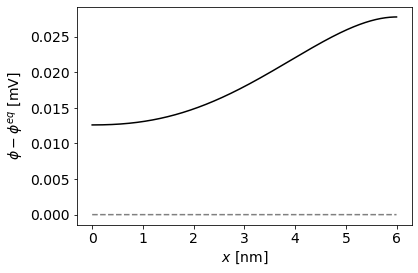

Walls distance (nm) 12 ,     Temperature difference (K)    =  -0.12000000000000001
charge DH (C/m²) (should be ~0 having two walls) = -6.475201375466382e-05
charge (C/m²) (should be ~0 having two walls) = -6.476076903728756e-05


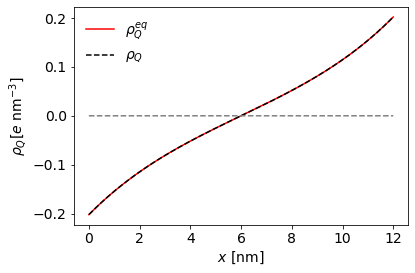

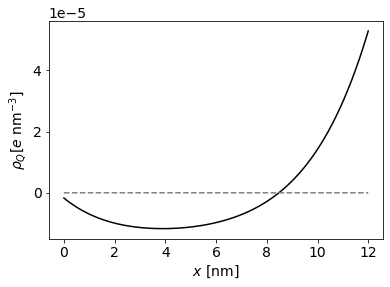

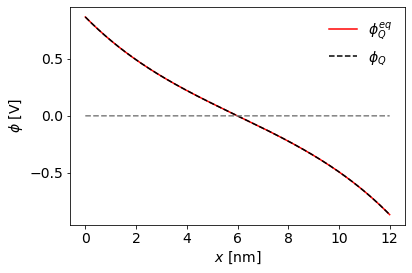

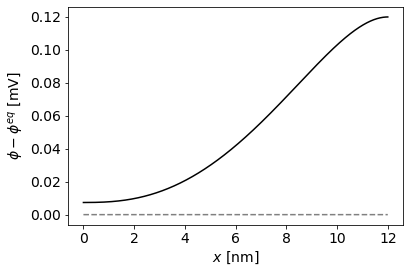

Walls distance (nm) 25 ,     Temperature difference (K)    =  -0.25
charge DH (C/m²) (should be ~0 having two walls) = -7.30816816638993e-05
charge (C/m²) (should be ~0 having two walls) = -7.309747680220668e-05


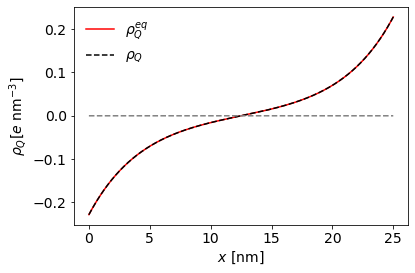

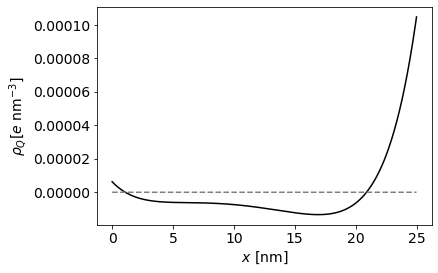

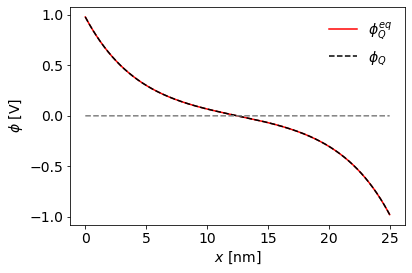

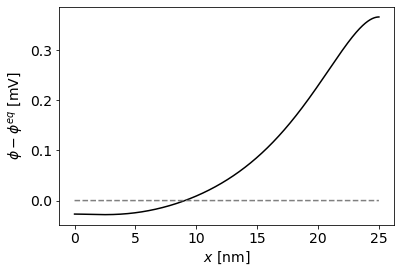

Walls distance (nm) 50 ,     Temperature difference (K)    =  -0.5
charge DH (C/m²) (should be ~0 having two walls) = -7.355222642548759e-05
charge (C/m²) (should be ~0 having two walls) = -7.358291464719974e-05


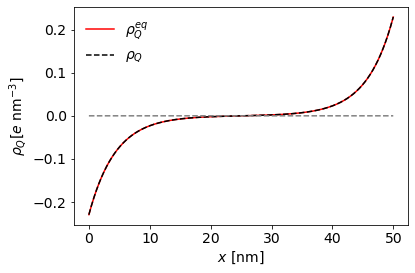

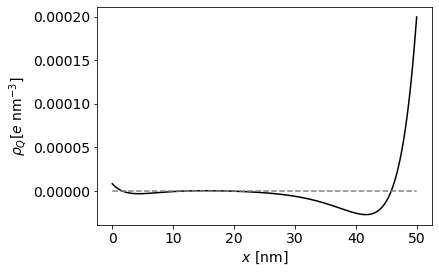

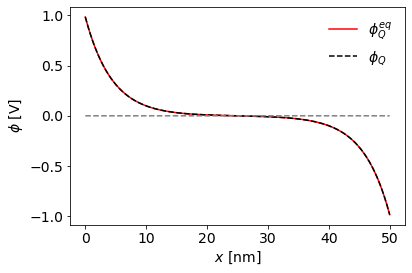

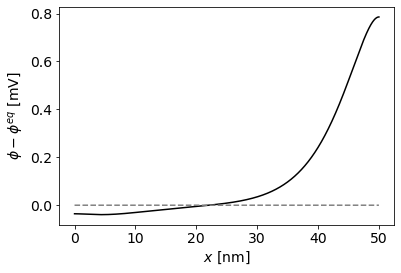

Walls distance (nm) 100 ,     Temperature difference (K)    =  -1.0
charge DH (C/m²) (should be ~0 having two walls) = -7.355375103857255e-05
charge (C/m²) (should be ~0 having two walls) = -7.361519181554501e-05


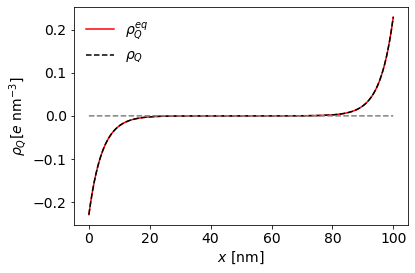

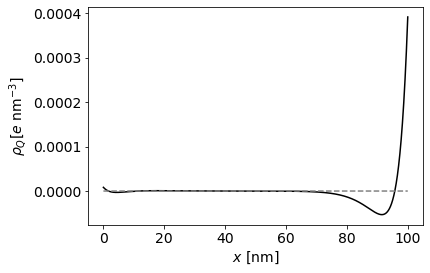

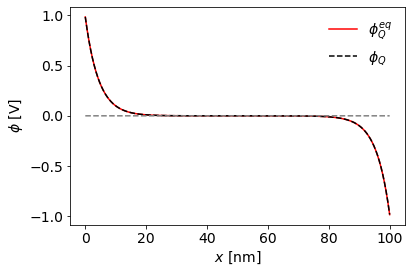

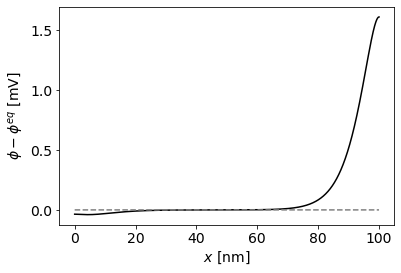

Walls distance (nm) 200 ,     Temperature difference (K)    =  -2.0
charge DH (C/m²) (should be ~0 having two walls) = -7.355375105463533e-05
charge (C/m²) (should be ~0 having two walls) = -7.367694216831291e-05


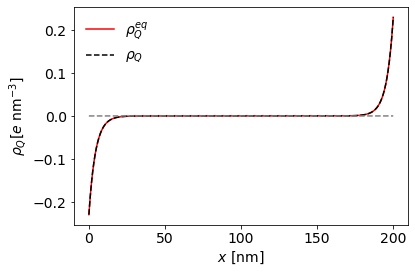

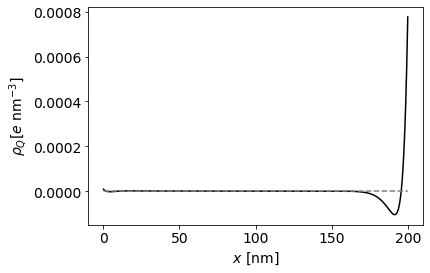

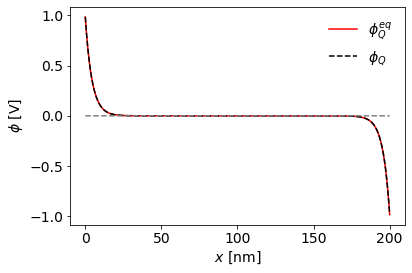

Walls distance (nm) 400 ,     Temperature difference (K)    =  -4.0
charge DH (C/m²) (should be ~0 having two walls) = -7.355375105508206e-05
charge (C/m²) (should be ~0 having two walls) = -7.380138054543164e-05


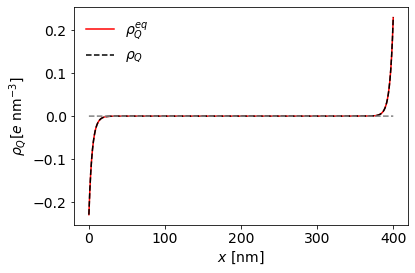

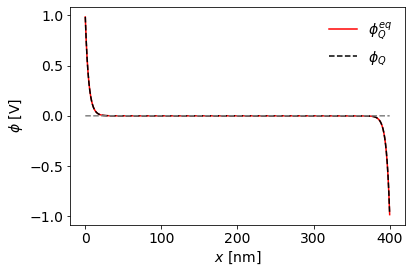

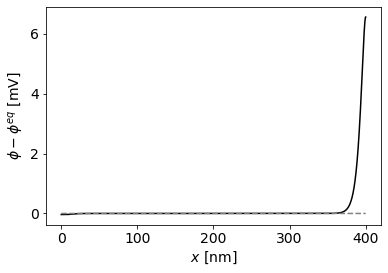

In [6]:
iL = 0
Lrange = np.array([3,6,12,25,50,100,200,400],int)
deltadeltaV = np.zeros(len(Lrange))
deltaVDH = np.zeros(len(Lrange))
deltaT = np.zeros(len(Lrange))
for L in Lrange:
    dx = 0.002e-9 # meters
    n = int(L*1e-9/dx)
    xcell = np.zeros(n)
    for ix in range(n):
        xcell[ix] = ix*dx#-L/2

    deltaT[iL] = L*1e-9*alpha # Kelvin
    print("Walls distance (nm)", L, ",     Temperature difference (K)    = ", deltaT[iL])    

    EDH = np.zeros((2,2))
    EDH[0,0] = eleDHeq1(0)
    EDH[0,1] = eleDHeq2(0)
    EDH[1,0] = eleDHeq1(L*1e-9)
    EDH[1,1] = eleDHeq2(L*1e-9)
    Efield = np.zeros(2)
    Efield[0] = eta/(eps0*eps)
    Efield[1] = eta/(eps0*eps)
    k = np.linalg.solve(EDH,Efield)

    Q = 0.0
    rhoQDHeq = np.zeros(int(n))
    potDHeq = np.zeros(int(n))
    for ix in range(int(n)):
        x = ix*dx#-L/2
        rhoQDHeq[ix] = k[0]*chargeDHeq1(x) + k[1]*chargeDHeq2(x)
        potDHeq[ix] = k[0]*potDHeq1(x) + k[1]*potDHeq2(x)
        Q+=rhoQDHeq[ix]
    print("charge DH (C/m²) (should be ~0 having two walls) =", Q*dx)

    EDH = np.zeros((2,2))
    EDH[0,0] = eleDH1(0)
    EDH[0,1] = eleDH2(0)
    EDH[1,0] = eleDH1(L*1e-9)
    EDH[1,1] = eleDH2(L*1e-9)
    Efield = np.zeros(2)
    Efield[0] = eta/(eps0*eps)
    Efield[1] = eta/(eps0*eps)
    k = np.linalg.solve(EDH,Efield)

    Q = 0.0
    rhoQDH = np.zeros(int(n))
    potDH = np.zeros(int(n))
    for ix in range(int(n)):
        x = ix*dx#-L/2
        rhoQDH[ix] = k[0]*chargeDH1(x) + k[1]*chargeDH2(x)
        potDH[ix] = k[0]*potDH1(x) + k[1]*potDH2(x)
        Q+=rhoQDH[ix]
    print("charge (C/m²) (should be ~0 having two walls) =", Q*dx)

    potdiff = potDH-potDHeq
    deltadeltaV[iL] = potdiff[-1]-potdiff[0]
    deltaVDH[iL] = potDH[-1]-potDH[0]
    iL+=1

    ffile = plt.figure()    
    matplotlib.rcParams.update({'font.size': 14})
    plt.plot(xcell*1e9,(rhoQDHeq)/elch*1e-27,color="red",label=r"$\rho^{eq}_Q$")
    plt.plot(xcell*1e9,(rhoQDH)/elch*1e-27,"--",color="black",label=r"$\rho_Q$")
    plt.plot(xcell*1e9,np.zeros(len(xcell)),"--",color="grey")
    plt.xlabel("$x$ [nm]")
    plt.ylabel(r"$\rho_Q [e$ nm$^{-3}]$")
    plt.legend(frameon=False)
    plt.show() 
    ffile.savefig("../figures/DH-charge-cell_L"+str(L)+".pdf",bbox_inches='tight',dpi=900)

    ffile = plt.figure()    
    matplotlib.rcParams.update({'font.size': 14})
    plt.plot(xcell*1e9,(rhoQDH-rhoQDHeq)/elch*1e-27,color="black")
    plt.plot(xcell*1e9,np.zeros(len(xcell)),"--",color="grey")
    plt.xlabel("$x$ [nm]")
    plt.ylabel(r"$\rho_Q [e$ nm$^{-3}]$")
    plt.show() 
    ffile.savefig("../figures/DH-charge-cell_diff_L"+str(L)+".pdf",bbox_inches='tight',dpi=900)

    ffile = plt.figure()    
    matplotlib.rcParams.update({'font.size': 14})
    plt.plot(xcell*1e9,(potDHeq),color="red",label=r"$\phi^{eq}_Q$")
    plt.plot(xcell*1e9,(potDH),"--",color="black",label=r"$\phi_Q$")
    plt.plot(xcell*1e9,np.zeros(len(xcell)),"--",color="grey")
    plt.xlabel("$x$ [nm]")
    plt.ylabel(r"$\phi$ [V]")
    plt.legend(frameon=False)
    plt.show() 
    ffile.savefig("../figures/DH-potential-cell_L"+str(L)+".pdf",bbox_inches='tight',dpi=900)

    ffile = plt.figure()    
    matplotlib.rcParams.update({'font.size': 14})
    plt.plot(xcell*1e9,(potDH-potDHeq)*1000,color="black")
    plt.plot(xcell*1e9,np.zeros(len(xcell)),"--",color="grey")
    plt.xlabel("$x$ [nm]")
    plt.ylabel(r"$\phi-\phi^{eq}$ [mV]")
    #plt.legend(frameon=False)
    plt.show() 
    ffile.savefig("../figures/DH-potential-cell_diff_L"+str(L)+".pdf",bbox_inches='tight',dpi=900)

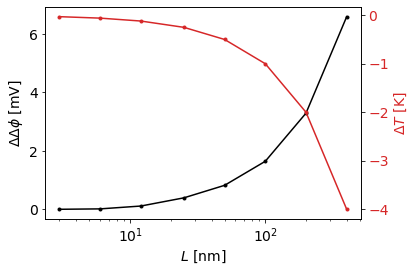

In [7]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("$L$ [nm]")
ax1.set_xscale("log")
ax1.set_ylabel(r"$\Delta \Delta \phi$ [mV]")
ax1.plot(Lrange, deltadeltaV*1000, ".-",color="black")
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel("$\Delta T$ [K]",color=color)  # we already handled the x-label with ax1
ax2.plot(Lrange, deltaT, ".-",color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xscale("log")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.legend(frameon=False)
plt.show()
fig.savefig("../figures/delta_delta_V.pdf",bbox_inches='tight',dpi=900)

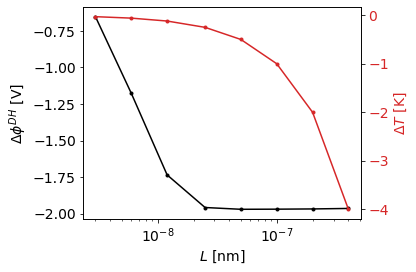

In [8]:
fig, ax1 = plt.subplots()

ax1.set_xlabel("$L$ [nm]")
ax1.set_xscale("log")
ax1.set_ylabel(r"$\Delta \phi^{DH}$ [V]")
ax1.plot(Lrange*1e-9, deltaVDH, ".-",color="black")
ax1.tick_params(axis='y')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'
ax2.set_ylabel("$\Delta T$ [K]",color=color)  # we already handled the x-label with ax1
ax2.plot(Lrange*1e-9, deltaT, ".-",color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_xscale("log")

fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.legend(frameon=False)
plt.show()
fig.savefig("../figures/delta_V_DH.pdf",bbox_inches='tight',dpi=900)

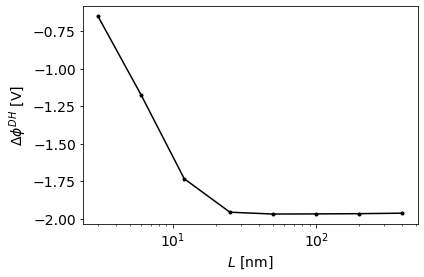

In [9]:
ffile = plt.figure()    
matplotlib.rcParams.update({'font.size': 14})
plt.plot(Lrange,deltaVDH,".-",color="black")
plt.xlabel("$L$ [nm]")
plt.ylabel(r"$\Delta \phi^{DH}$ [V]")
plt.xscale("log")
#plt.legend(frameon=False)
plt.show() 
ffile.savefig("../figures/delta_V_DH.pdf",bbox_inches='tight',dpi=900)

In [10]:
print("   L [nm]       DeltaDelta\phi [mV]\n")
print(np.array([Lrange,deltadeltaV*1000]).T)

   L [nm]       DeltaDelta\phi [mV]

[[3.00000000e+00 1.22217940e-03]
 [6.00000000e+00 1.51748700e-02]
 [1.20000000e+01 1.12437877e-01]
 [2.50000000e+01 3.92958347e-01]
 [5.00000000e+01 8.21284814e-01]
 [1.00000000e+02 1.64368222e+00]
 [2.00000000e+02 3.29011800e+00]
 [4.00000000e+02 6.59129793e+00]]


In [11]:
print("1/kappa_D = ", 1e9/np.sqrt(c/a), "nm")

1/kappa_D =  4.356479382863113 nm


In [12]:
print("Gouy-Chapman surface potential = ", eta/eps0/eps/np.sqrt(c/a), "V")

Gouy-Chapman surface potential =  0.9853884761239897 V
